# Lernpfad zur barometrischen Höhenformel

In diesem Jupyter Notebook werden wir ein wenig mit der **barometrischen Höhenformel** experimentieren, um diese näher kennenzulernen.

In [1]:
import math
import matplotlib.pyplot as plt
import pandas
import sympy
sympy.init_printing()

In [2]:
rho, rho_0, g, h, P_0 = sympy.symbols('rho rho_0 g h P_0')

Wir verwenden als Ausgangspunkt die **barometrische Höhenformel**, wie sie von der **Fakultät für Physik und Astronomie** der **Julius-Maximilian-Universität Würzburg** auf ihrer Website angegeben wird: https://pawn.physik.uni-wuerzburg.de/video/thermodynamik/k/sk05.html. In Python-Notation mit _sympy_ sieht sie folgendermassen aus:

In [3]:
Formel = sympy.Eq(rho, rho_0 * sympy.exp(- (rho_0 / P_0) * g * h) )
print(Formel)

Eq(rho, rho_0*exp(-g*h*rho_0/P_0))


Und in mathenatischer Schreibung dann so:

In [4]:
display(Formel)

d = gegebener Luftdruck  (in Pa)

p0 = Standard-Luftdruck auf Meereshöhe (in Pa)

rho0 = Standard-Luftdichte auf Meereshöhe (in kg/m^3)

g = Erdbeschleunigung (in m/s^2)

Wir lassen _sympy_ nach _h_ umformen:

In [5]:
Loesung = sympy.solve(Formel, h)
print(Loesung)

[P_0*log(rho_0/rho)/(g*rho_0)]


Das ist die oben aufgeführte barometrische Höhenformel, jedoch aufgelöst nach der Höhe _h_. Auch hier wenden wir für eine besssere Lesbarkeit die mathematische Darstellung per `display()`-Funktion an:

In [6]:
display(Loesung)

Leider kann _sympy_ uns nicht auch den Weg der Umformung in anschaulicher Weise anzeigen. Wen es trotzdem interessiert, zeige ich im Folgenden einen möglichen Lösungsweg:

1. **Beide Seiten durch ρ₀ teilen:**

   ```
   ρ / ρ₀ = exp(-g * h * ρ₀ / P₀)
   ```

2. **Natürlichen Logarithmus (ln) auf beiden Seiten anwenden:**

   ```
   ln(ρ / ρ₀) = ln(exp(-g * h * ρ₀ / P₀))
   ```

   Da `ln(exp(x)) = x`, vereinfacht sich dies zu:

   ```
   ln(ρ / ρ₀) = -g * h * ρ₀ / P₀
   ```

3. **Beide Seiten mit -1 multiplizieren:**

   ```
   -ln(ρ / ρ₀) = g * h * ρ₀ / P₀
   ```

4. **Verwenden der Logarithmus-Regel `ln(a/b) = -ln(b/a)`:**

   ```
   ln(ρ₀ / ρ) = g * h * ρ₀ / P₀
   ```

5. **Beide Seiten mit P₀ multiplizieren:**

   ```
   P₀ * ln(ρ₀ / ρ) = g * h * ρ₀
   ```

6. **Beide Seiten durch g * ρ₀ teilen:**

   ```
   P₀ * ln(ρ₀ / ρ) / (g * ρ₀) = h
   ```

7. **h auf die linke Seite bringen:**

   ```
   h = P₀ * ln(ρ₀ / ρ) / (g * ρ₀)
   ```

In [7]:
# Gegebene Werte
P_0 = 101325  # Standardluftdruck auf Meereshöhe in Pa
rho_0 = 1.225  # Standardluftdichte auf Meereshöhe in kg/m³
g = 9.81  # Erdbeschleunigung in m/s²

Wir machen eine Testrechnung, indem wir berechnen auf welcher Höhe wir uns befinden würden, wenn wir einen Luftdruck von _898 hPa_ messen:

In [8]:
P = 898 * 100  # Druck in Pa
rho = (P * rho_0) / P_0  # Luftdichte in der Höhe
h = P_0 * math.log(rho_0 / rho) / (g * rho_0)  # Höhe berechnen
h

Die Berechnung ergibt, dass ein Luftdruck von _898 hPa_ in einer Höhe von _1'018 Metern_ besteht.

In C++ für Arduino folgende Form:

```cpp
#include <math.h>
...
const P_0 = 101325;
const rho_0 = 1.225;
const g = 9.81;
double absoluteHeight = P_0 * log(rho_0 / (bmp388.pressure * rho_0) / P_0) / (g * rho_0);
...
```

Der Druckwert des _BMP388_ wird als Variable im _Nenner_ einer **Division** verwendet. So etwas birgt immer die Gefahr einer _Division durch 0_ und damit eines **undefinierten Fehlerzustands**. Wir werden jedoch im Folgenden sehen, dass selbst bei _10 km_ Höhe noch recht hohe Druckwerte vorherrschen. Erst ab ca. _100 km_ beginnt der **Übergang zum Weltall** und geht der Luftdruck gegen 0. Das heisst, in unserem _geplanten Operationsbereich_ wird der Druckwert realistischerweise nie 0 betragen und wir können diesen Fall getrost aussschliessen.

Die folgende Tabelle stellt **Höhenwerte** und die jeweils vorherrschenden **Luftdrücke** bis zu einer Höhe von _10 km_ gegenüber:

In [12]:
# Höhenbereich
h_werte = range(0, 10001, 1000)  # Höhenwerte von 0 bis 10 km in 1-km-Schritten

# Liste für die Druckwerte
P_werte = []

# Berechne den Druck für jede Höhe
for h in h_werte:
  rho = rho_0 * math.exp(- (rho_0 / P_0) * g * h)  # Berechne die Luftdichte
  P = P_0 * rho / rho_0  # Berechne den Druck
  P_werte.append(P / 100)  # Umrechnung in hPa

baro_data = {"Höhe (Meter)": h_werte, "Luftdruck (hPa)": P_werte}
baro_table = pandas.DataFrame(baro_data)
baro_table

,Höhe (Meter),Luftdruck (hPa)
0,0,1013.250000
1,1000,899.930222
2,2000,799.283893
3,3000,709.893640
4,4000,630.500608
5,5000,559.986728
6,6000,497.358974
7,7000,441.735379
8,8000,392.332610
9,9000,348.454945


Auch im Plot des Diagramms lässt sich gut erkennen, dass der Zusammenhang zwischen Höhe und Luftdruck nicht liniar, sondern logarithmisch ist. Der Verlauf des Graphen ist leicht gebeugt:

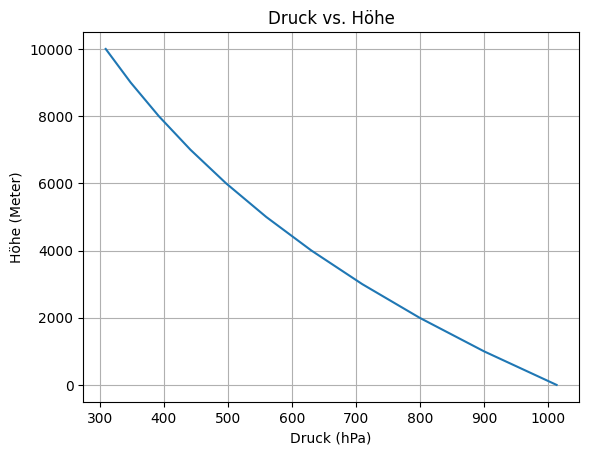

In [10]:
plt.plot(P_werte, h_werte)
plt.xlabel("Druck (hPa)")
plt.ylabel("Höhe (Meter)")
plt.title("Druck vs. Höhe")
plt.grid(True)
plt.show()